## Neural Network Model

Las redes neuronales artificiales están basadas en el funcionamiento de las redes de neuronas biológicas. Las neuronas que todos tenemos en nuestro cerebro están compuestas de dendritas, el soma y el axón: Las dendritas se encargan de captar los impulsos nerviosos que emiten otras neuronas. Estos impulsos, se procesan en el soma y se transmiten a través del axón que emite un impulso nervioso hacia las neuronas contiguas. 

En el caso de las neuronas artificiales, la suma de las entradas multiplicadas por sus pesos asociados determina el “impulso nervioso” que recibe la neurona. Este valor, se procesa en el interior de la célula mediante una función de activación que devuelve un valor que se envía como salida de la neurona.

Las neuronas de la primera capa reciben como entrada los datos reales que alimentan a la red neuronal.  Es por eso por lo que la primera capa se conoce como capa de entrada. La salida de la última capa es el resultado visible de la red, por lo que la última capa se conoce como la capa de salida. Las capas que se sitúan entre la capa de entrada y la capa de salida se conocen como capas ocultas ya que desconocemos tanto los valores de entrada como los de salida.

In [1]:
# Importamos las librerías necesarias

import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,MaxPooling1D
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
# Representaciones graficas locales

%pylab
%matplotlib inline

%config InlineBackend.figure_format = 'retina'

# Obviamos los errores de actualización 

import warnings
warnings.filterwarnings('ignore')
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', 50)


# Ponemos la semilla
np.random.seed(0)

Using TensorFlow backend.


Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [2]:
# Importamos la función de limpieza y preprocesado de datos
import frauddef # con solo las variables de research

In [3]:
# Importamos el dataset 
df = pd.read_csv('Explor_uscecchini28.csv')

In [4]:
# Establecemos las variables X e Y
X_train_nm, X_test_nm, y_train_nm, y_test_nm, X_train_sm, X_test_sm, y_train_sm, y_test_sm = frauddef.limpieza(df)

In [5]:
# ajustamos el parametro "n_components" que nos a indicar cuantos componentes necesitamos para explicar el 95 % de los datos
pca = PCA(n_components=0.95)

# hacemos la transofrmación del Train y Test
X_train_sm = pca.fit_transform(X_train_sm)
X_test_sm = pca.transform(X_test_sm)

# Selección del número de n_components
print("Number of PCA components: ", pca.n_components_)

Number of PCA components:  3


In [6]:
# Inicializar la RNA
classifier = Sequential()

In [7]:
# Añadir las capas de entrada
classifier.add(Dense(units = 50, kernel_initializer = "uniform",  
                     activation = "relu", input_dim = 35))

In [8]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 35, kernel_initializer = "uniform",  activation = "relu"))

In [9]:
# Añadir la segunda capa oculta
classifier.add(Dense(units = 15, kernel_initializer = "uniform",  activation = "sigmoid"))

In [10]:
# Añadir la tercera capa oculta
#classifier.add(Dense(units = 3, kernel_initializer = "uniform",  activation = "sigmoid"))

In [11]:
# Añadir la capa de salida
classifier.add(Dense(units = 1, kernel_initializer = "uniform",  activation = "sigmoid"))

In [12]:
# Compilar la RNA
classifier.compile(optimizer = "adam", loss = "binary_crossentropy", metrics = ["accuracy"])

In [13]:
# Ajustamos la RNA al Conjunto de Entrenamiento
classifier.fit(X_train_nm, y_train_nm,  batch_size = 10, epochs = 100)

Epoch 1/100
113/113 [==============================] - 0s 4ms/step - loss: 0.6964 - accuracy: 0.5133
Epoch 2/100
113/113 [==============================] - 0s 185us/step - loss: 0.6823 - accuracy: 0.6814
Epoch 3/100
113/113 [==============================] - 0s 194us/step - loss: 0.6730 - accuracy: 0.8850
Epoch 4/100
113/113 [==============================] - 0s 194us/step - loss: 0.6587 - accuracy: 0.8850
Epoch 5/100
113/113 [==============================] - 0s 177us/step - loss: 0.6471 - accuracy: 0.8938
Epoch 6/100
113/113 [==============================] - 0s 190us/step - loss: 0.6328 - accuracy: 0.9115
Epoch 7/100
113/113 [==============================] - 0s 194us/step - loss: 0.6221 - accuracy: 0.8938
Epoch 8/100
113/113 [==============================] - 0s 203us/step - loss: 0.6192 - accuracy: 0.8496
Epoch 9/100
113/113 [==============================] - 0s 186us/step - loss: 0.6034 - accuracy: 0.8850
Epoch 10/100
113/113 [==============================] - 0s 178us/step - los

In [14]:
# Una vez que se "construye" un modelo, puede llamar a su summary() método para mostrar su contenido:
classifier.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 50)                1800      
_________________________________________________________________
dense_2 (Dense)              (None, 35)                1785      
_________________________________________________________________
dense_3 (Dense)              (None, 15)                540       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 16        
Total params: 4,141
Trainable params: 4,141
Non-trainable params: 0
_________________________________________________________________


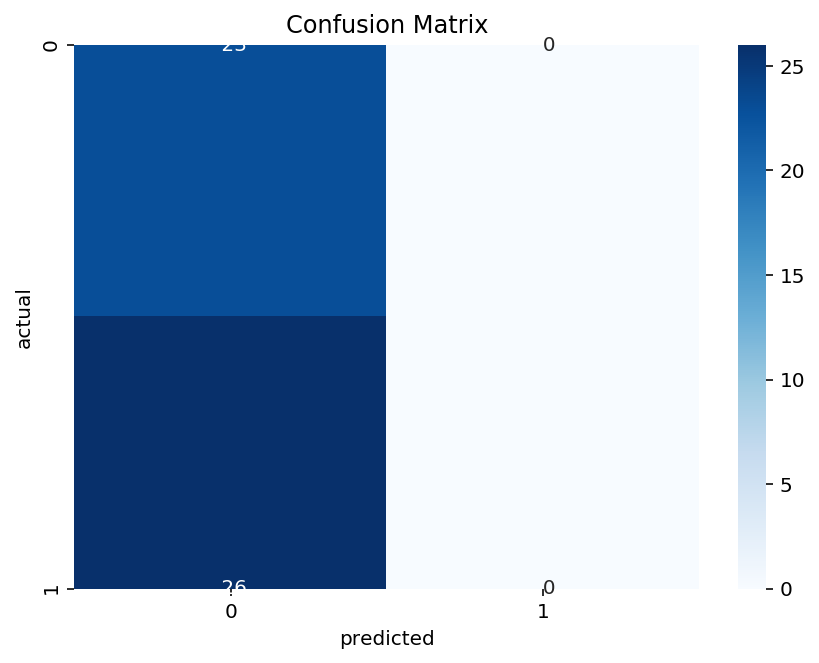

In [15]:
# Parte 3 - Evaluar el modelo y calcular predicciones finales

# Predicción de los resultados con el Conjunto de Testing
y_pred  = classifier.predict(X_test_nm)
# Establecemos el acierto en el 95 %
y_pred = (y_pred>0.95)
# Elaborar una matriz de confusión
from sklearn.metrics import accuracy_score, auc, confusion_matrix, f1_score, precision_score, recall_score, roc_curve, roc_auc_score
cm = confusion_matrix(y_test_nm, y_pred)
false_positive_rate, recall, thresholds = roc_curve(y_test_nm, y_pred) # el area bajo la curva
# representar la matriz de confusión
plt.figure(figsize=(7,5))
sns.heatmap(cm,  cmap= 'Blues', annot=True, fmt='3')
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('Confusion Matrix')
plt.show()

In [16]:
# accuracy
accuracy_score(y_test_nm, y_pred)

0.46938775510204084

In [17]:
# F1
f1_score(y_test_nm, y_pred)

0.0

In [18]:
# AUC
roc_auc_score(y_test_nm, y_pred)

0.5